<a href="https://colab.research.google.com/github/meghana-bharadwaj/Sentiment-Analysis/blob/main/RNN_LSTM_with_Keras_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array

#supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled=True

#Fetch "IMDB Movie Review" data, constraining our reviews to the 
#10000 most commonly used words
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

#Map for readable classnames
class_names = ["Negative", "Positive"]

## Create a map for converting IMDB dataset to readable reviews -
Reviews in IMDB dataset have been encoded as a sequence of 
integers and also contain an index for converting reviews back into human readable form




In [3]:
#Get the word index from the dataset
word_index = tf.keras.datasets.imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [7]:
print(word_index.items())

dict_items([('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008), ("hold's", 52009), ('comically', 11307), ('localized', 40830), ('disobeying', 30568), ("'royale", 52010), ("harpo's", 40831), ('canet', 52011), ('aileen', 19313), ('acurately', 52012), ("diplomat's", 52013), ('rickman', 25242), ('arranged', 6746), ('rumbustious', 52014), ('familiarness', 52015), ("spider'", 52016), ('hahahah', 68804), ("wood'", 52017), ('transvestism', 40833), ("hangin'", 34702), ('bringing', 2338), ('seamier', 40834), ('wooded', 34703), ('bravora', 52018), ('grueling', 16817), ('wooden', 1636), ('wednesday', 16818), ("'prix", 52019), ('altagracia', 34704), ('circuitry', 52020), ('crotch', 11585), ('busybody', 57766), ("tart'n'tangy", 52021), ('burgade', 14129), ('thrace', 52023), ("tom's", 11038), ('snuggles', 52025), ('francesco', 29114), ('complainers', 52027), ('templari

In [8]:
#ensure that "special" words are mapped into human readable terms
#According the documentation 0th index is padding, 1 is start, 2 is unknown, 3 is unused 
#so we use k:(v+3)
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

In [14]:
#perform reverse word lookup and make it callable
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

In [15]:
print(reverse_word_index)

{34704: 'fawn', 52009: 'tsukino', 52010: 'nunnery', 16819: 'sonja', 63954: 'vani', 1411: 'woods', 16118: 'spiders', 2348: 'hanging', 2292: 'woody', 52011: 'trawling', 52012: "hold's", 11310: 'comically', 40833: 'localized', 30571: 'disobeying', 52013: "'royale", 40834: "harpo's", 52014: 'canet', 19316: 'aileen', 52015: 'acurately', 52016: "diplomat's", 25245: 'rickman', 6749: 'arranged', 52017: 'rumbustious', 52018: 'familiarness', 52019: "spider'", 68807: 'hahahah', 52020: "wood'", 40836: 'transvestism', 34705: "hangin'", 2341: 'bringing', 40837: 'seamier', 34706: 'wooded', 52021: 'bravora', 16820: 'grueling', 1639: 'wooden', 16821: 'wednesday', 52022: "'prix", 34707: 'altagracia', 52023: 'circuitry', 11588: 'crotch', 57769: 'busybody', 52024: "tart'n'tangy", 14132: 'burgade', 52026: 'thrace', 11041: "tom's", 52028: 'snuggles', 29117: 'francesco', 52030: 'complainers', 52128: 'templarios', 40838: '272', 52031: '273', 52133: 'zaniacs', 34709: '275', 27634: 'consenting', 40839: 'snuggle

In [16]:
def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Data insight
here we take a closer look at our data. How many words does our review contain?
what does the review look like in machine and human readable form? 

In [17]:
#Concatenate test and training data
allreviews = np.concatenate((x_train,x_test),axis=0)

#Review lenghts across test and training whole datasets
print("Max review length: {}". format(len(max((allreviews), key=len))))
print("Min review length: {}".format(len(min((allreviews),key=len))))
result = [len(x) for x in allreviews]
print("Mean review length: {}".format(np.mean(result)))

Max review length: 2494
Min review length: 7
Mean review length: 234.75892


In [18]:
#Print the review and its class as stored in dataset
#Replace the number to select a different review

print("Machine Readable review")
print(" Review Text " +str(x_train[60]))
print(" Review Sentiment "+str(y_train[60]))

Machine Readable review
 Review Text [1, 13, 219, 14, 33, 4, 2, 22, 1413, 12, 16, 373, 175, 2711, 1115, 1026, 430, 939, 16, 23, 2444, 25, 43, 697, 89, 12, 16, 170, 8, 130, 262, 19, 32, 4, 665, 7, 4, 2, 322, 5, 4, 1520, 7, 4, 86, 250, 10, 10, 4, 249, 173, 16, 4, 3891, 6, 19, 4, 167, 564, 5, 564, 1325, 36, 805, 8, 216, 638, 17, 2, 21, 25, 100, 376, 507, 4, 2110, 15, 79, 125, 23, 567, 13, 2134, 233, 36, 4852, 2, 5, 81, 1672, 10, 10, 92, 437, 129, 58, 13, 69, 8, 401, 61, 1432, 39, 1286, 46, 7, 12]
 Review Sentiment 0


In [21]:
#print the review and its class in human readable format
#Replace the number to select a different row

print(" Human Readable Review ")
print(" Review Text " +decode_review(x_train[60]))
print(" Review Sentiment "+class_names[y_train[60]])

 Human Readable Review 
 Review Text <START> i saw this at the <UNKNOWN> film festival it was awful every clichéd violent rich boy fantasy was on display you just knew how it was going to end especially with all the shots of the <UNKNOWN> wife and the rape of the first girl br br the worst part was the q a with the director writer and writer producer they tried to come across as <UNKNOWN> but you could tell they're the types that get off on violence i bet anything they frequent <UNKNOWN> and do drugs br br don't waste your time i had to keep my boyfriend from walking out of it
 Review Sentiment Negative


# Preprocessing the Data
we need to make sure that our reviews are of uniform length. This is for LSTM's parameters
Some reviews will need to be truncated while others need to be padded


In [22]:
#length of the reviews
review_length = 500

#padding/truncated our reviews
x_train = sequence.pad_sequences(x_train,maxlen=review_length)
x_test = sequence.pad_sequences(x_test, maxlen = review_length)

#Check the size of our datasets. Review data for both test and training and they
#shld've 25000 reviews of 500 integers.
#Class data should contain 25000 values one for each review
#Class values are 0 or 1, indicating a negative or positive review

print("Shape training review data: "+str(x_train.shape))
print("Shape training class data: "+str(y_train.shape))

print("Shape Test Review data: "+str(x_test.shape))
print("Shape Test class data: "+str(y_test.shape))

#Note that padding is added to start of the review and not the end

print(" ")
print(" Human Readable Review Test(post padding): "+decode_review(x_train[50]))

Shape training review data: (25000, 500)
Shape training class data: (25000,)
Shape Test Review data: (25000, 500)
Shape Test class data: (25000,)
 
 Human Readable Review Test(post padding): <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

# Setting up LSTM Network Architecture
 Create and build LSTM RNN
 

In [25]:
#We begin by defining an empty stack that we'll use for building our network layer by layer

model = tf.keras.models.Sequential()

#Embedding layer provides a spatial mapping (or Word Embedding) of all the individual words in our
#training set. Words close to one another share context/meaning.
#This spatial mapping is learning during the training process.

model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size,
        output_dim = 32, #Dimensions to which each words shall be mapped
        input_length = review_length
    )
)

#Dropoutlayers fight overfitting 
model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

#using fast version of LSTM which is optimised for GPUs.
#This layers looks at the sequence of words in the review along with their word 
#embeddings and uses both of these to determine to sentiment of a given review

model.add(
    tf.keras.layers.LSTM(
        units=32
    )
)

#Add a second dropout layer with same aim as first
model.add(
    tf.keras.layers.Dropout(
        rate = 0.25
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1,
        activation = 'sigmoid'
    )
)

#compile the model

model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 dropout_2 (Dropout)         (None, 500, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


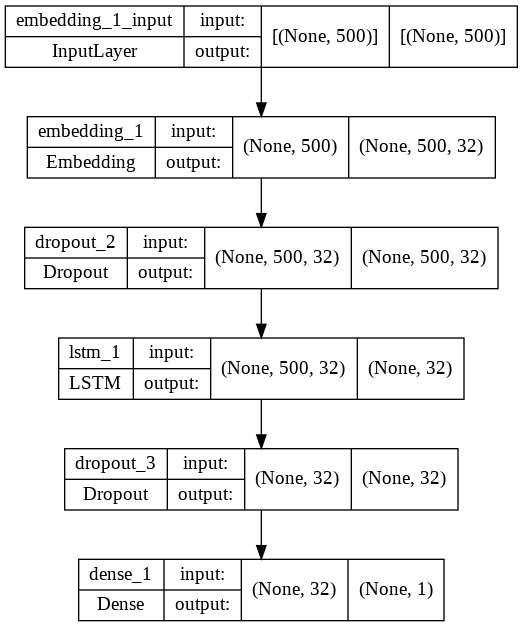

In [26]:
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names=True)

# Train the LSTM

In [27]:
#train the LSTM on training data
history = model.fit(
    x_train,y_train,

    #number of samples to work through before updating the 
    #initial model parameters via backpropogation
    #the higher the batch, more memory you need
    batch_size = 256,

    #an epoch is an iteration over the entire training data
    epochs = 3,
    validation_split=0.2,
    verbose = 1
)

Epoch 1/3
79/79 [==============================] - 44s 533ms/step - loss: 0.6314 - accuracy: 0.6687 - val_loss: 0.4874 - val_accuracy: 0.8036
Epoch 2/3
79/79 [==============================] - 41s 518ms/step - loss: 0.3731 - accuracy: 0.8559 - val_loss: 0.3305 - val_accuracy: 0.8664
Epoch 3/3
79/79 [==============================] - 40s 510ms/step - loss: 0.2465 - accuracy: 0.9104 - val_loss: 0.3188 - val_accuracy: 0.8698


In [29]:
#Get model predictions for test data
from sklearn.metrics import classification_report
predicted = model.predict(x_test)
predicted_classes = np.argmax(predicted,axis=1)
print(classification_report(y_test,predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67     12500
    Positive       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# View some incorrect predictions

we remove the padding for readability

In [30]:
predicted_classes_reshaped = np.reshape(predicted_classes,25000)
incorrect = np.nonzero(predicted_classes_reshaped!=y_test)[0]

for j, incorrect in enumerate(incorrect[0:20]):
  predicted = class_names[predicted_classes_reshaped[incorrect]]
  actual = class_names[y_test[incorrect]]
  human_readable_review = decode_review(x_test[incorrect])

  print("Incorrectly classified Test Review ["+str(j+1)+"]")
  print("Test Review #"+str(incorrect) +":Predicted["+predicted+"] Actual ["+actual+"]")
  print("Test Review Text: "+human_readable_review.replace("<PAD>"," "))
  print(" ")

Incorrectly classified Test Review [1]
Test Review #1:Predicted[Negative] Actual [Positive]
Test Review Text:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 <START> this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances <UNKNOWN> the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere <UNKNOWN> with sexual tension and psychological <UNKNOWN> it's very interesting that robert alt

## Run your own text against the trained model

This is a fun way to test out the limits of the trained model. To avoid getting errors - type in lower case only and do not use punctuation! 

You'll see the raw prediction from the model - basically a value between 0 and 1.



In [31]:
# Write your own review
review = "this was a terrible film with too much sex and violence i walked out halfway through"
#review = "this is the best film i have ever seen it is great and fantastic and i loved it"
#review = "this was an awful film that i will never see again"

# Encode review (replace word with integers)
tmp = []
for word in review.split(" "):
    tmp.append(word_index[word])

# Ensure review is 500 words long (by padding or truncating)
tmp_padded = sequence.pad_sequences([tmp], maxlen=review_length) 

# Run your processed review against the trained model
rawprediction = model.predict(array([tmp_padded][0]))[0][0]
prediction = int(round(rawprediction))

# Test the model and print the result
print("Review: " + review)
print("Raw Prediction: " + str(rawprediction))
print("Predicted Class: " + class_names[prediction])

Review: this was a terrible film with too much sex and violence i walked out halfway through
Raw Prediction: 0.077813774
Predicted Class: Negative
